In [1]:
import numpy as np
from datascience import *

# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [2]:
trips = Table.read_table('trip.csv')
commute = trips.where(trips.column('Duration') < 1800)

In [3]:
half_hour = 30 * 60
np.arange(0, half_hour+1, 60)

array([   0,   60,  120,  180,  240,  300,  360,
        420,  480,  540,  600,  660,  720,  780,
        840,  900,  960, 1020, 1080, 1140, 1200,
       1260, 1320, 1380, 1440, 1500, 1560, 1620,
       1680, 1740, 1800])

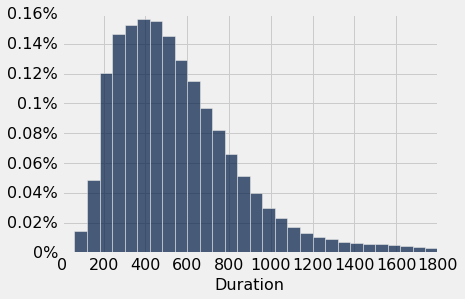

In [4]:
def every(k):
    commute.hist('Duration', bins=np.arange(0, half_hour+1, k))
every(60)

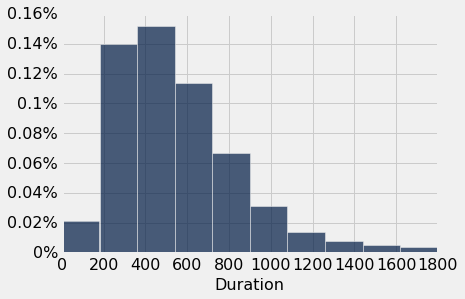

In [5]:
every(180)

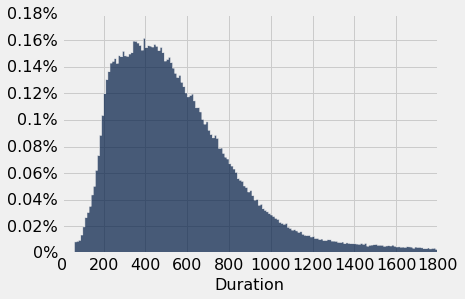

In [6]:
every(10)

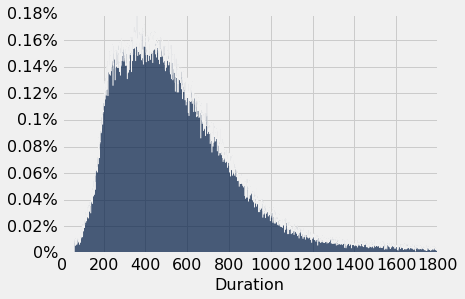

In [7]:
every(1)

In [74]:
weather = Table.read_table('weather.csv')
sf = weather.where('Zip', 94107).select([0, 1, 3]).relabeled(1, 'High').relabeled(2, 'Low')
sf

PDT,High,Low
9/1/2014,83,57
9/2/2014,72,60
9/3/2014,76,61
9/4/2014,74,61
9/5/2014,72,60
9/6/2014,72,60
9/7/2014,72,60
9/8/2014,68,59
9/9/2014,72,57
9/10/2014,82,54


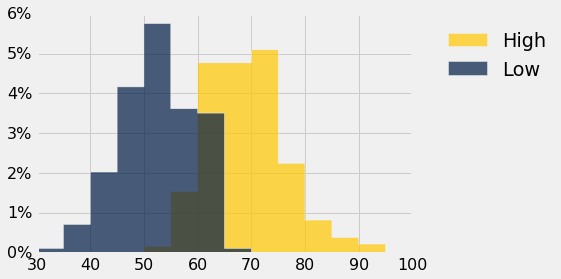

In [75]:
sf.hist([1, 2], bins=np.arange(30, 101, 5))

#### Discussion question

In [44]:
sf.where(sf.column('Min') >= 45).num_rows / 365

0.8575342465753425

In [42]:
sf.where(np.logical_and(sf.column('Max') >= 60,
                        sf.column('Max') < 70)).num_rows / 365

0.4767123287671233

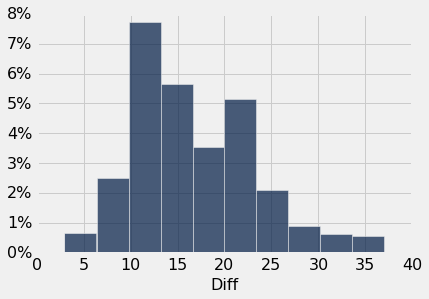

In [35]:
sf.with_column('Diff', sf.column('Max') - sf.column('Min')).hist('Diff')

## Deterministic Samples

In [11]:
top = Table.read_table('top_movies.csv')
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


In [12]:
top.take([3, 18, 100]) 

Title,Studio,Gross,Gross (Adjusted),Year
Jurassic World,Universal,"652,270,625","687,728,000",2015
Spider-Man,Sony,"403,706,375","604,517,300",2002
Gone with the Wind,MGM,"198,676,459","1,757,788,200",1939


In [13]:
top.take(np.arange(0, top.num_rows, 40))

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Shrek the Third,Paramount/Dreamworks,"322,719,944","408,090,600",2007
Bruce Almighty,Universal,"242,829,261","350,350,700",2003
Three Men and a Baby,Buena Vista (Disney),"167,780,960","362,822,900",1987
Saturday Night Fever,Paramount,"94,213,184","353,261,200",1977


## Probability sample

In [14]:
np.random.randint(3, 8)  # select once at random from 3, 4, 5, 6, 7

3

In [81]:
start = np.random.randint(0, 10)
top.take(np.arange(start, top.num_rows, 10))

Title,Studio,Gross,Gross (Adjusted),Year
Avatar,Fox,"760,507,625","846,120,800",2009
E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,234,132,700",1982
Frozen,Buena Vista (Disney),"400,738,009","426,656,900",2013
Transformers: Dark of the Moon,Paramount/Dreamworks,"352,390,543","385,069,700",2011
Transformers,Paramount/Dreamworks,"319,246,193","403,697,900",2007
Pirates of the Caribbean: The Curse of the Black Pearl,Buena Vista (Disney),"305,413,918","440,645,400",2003
The Empire Strikes Back,Fox,"290,475,067","854,171,500",1980
How the Grinch Stole Christmas,Universal,"260,044,825","418,529,400",2000
Ghostbusters,Columbia,"242,212,467","619,211,400",1984
Beauty and the Beast,Buena Vista (Disney),"218,967,620","394,664,300",1991


## Uniform random sample

In [73]:
top.sample(20)

Title,Studio,Gross,Gross (Adjusted),Year
Armageddon,Buena Vista (Disney),"201,578,182","373,929,700",1998
Alice in Wonderland (2010),Buena Vista (Disney),"334,191,110","365,718,600",2010
Harry Potter and the Sorcerer's Stone,Warner Bros.,"317,575,550","486,442,900",2001
The Bridge on the River Kwai,Columbia,"27,200,000","473,280,000",1957
Terminator 2: Judgment Day,TriS,"204,843,345","423,310,500",1991
Ghostbusters,Columbia,"242,212,467","619,211,400",1984
Earthquake,Universal,"79,666,653","366,719,500",1974
Lady and the Tramp,Disney,"93,602,326","484,893,500",1955
Gone with the Wind,MGM,"198,676,459","1,757,788,200",1939
Transformers,Paramount/Dreamworks,"319,246,193","403,697,900",2007


In [16]:
die = Table().with_column('Face', [1, 2, 3, 4, 5, 6])
die

Face
1
2
3
4
5
6


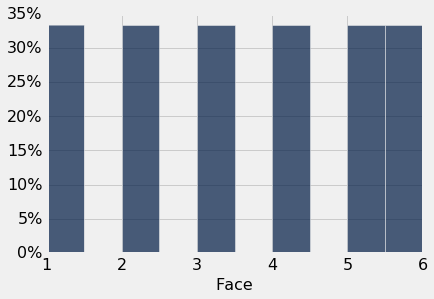

In [17]:
die.hist()

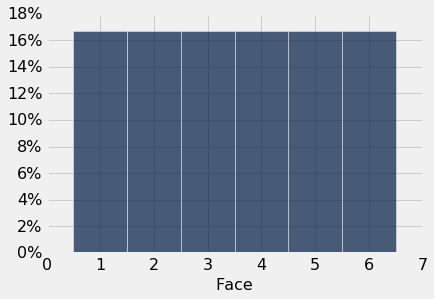

In [48]:
dice_bins = np.arange(0.5, 7, 1)
die.hist(bins=dice_bins)

In [19]:
die.sample(10, with_replacement=True)

Face
3
2
1
2
5
2
4
4
5
4


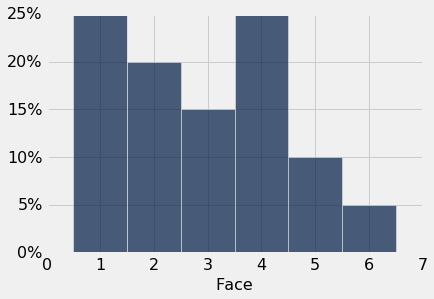

In [49]:
def dice_hist(n):
    rolls = die.sample(n, with_replacement=True)
    rolls.hist(bins=dice_bins)
    
dice_hist(20)

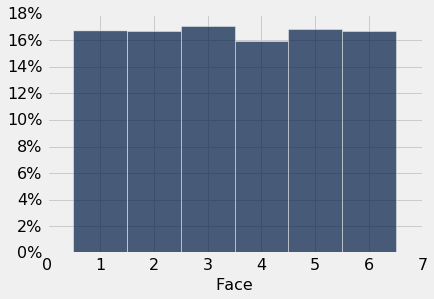

In [50]:
dice_hist(10000)

## Iteration

In [51]:
for i in np.arange(5):
    print(i)

0
1
2
3
4


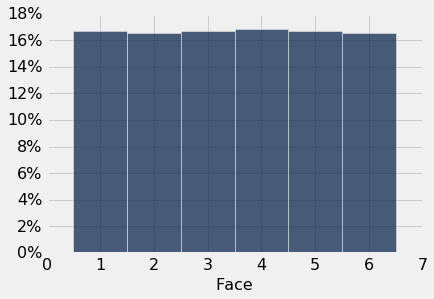

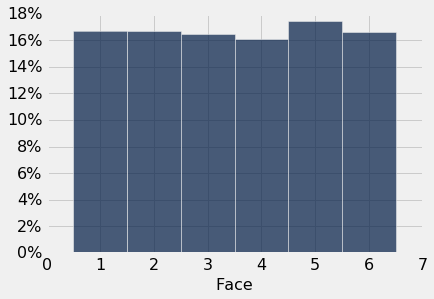

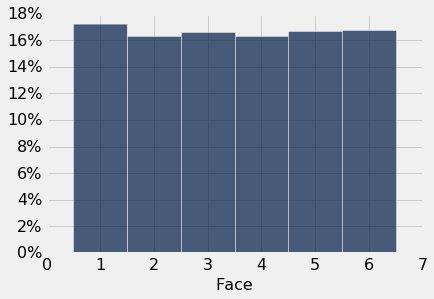

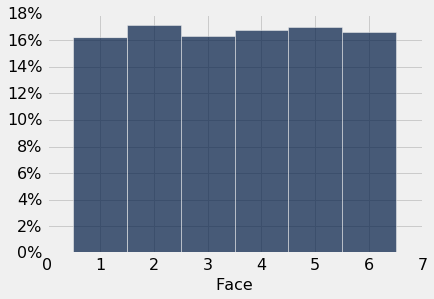

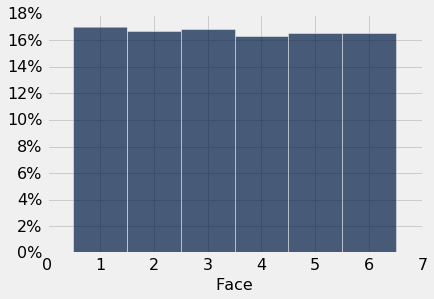

In [52]:
for i in np.arange(5):
    dice_hist(10000)

In [60]:
def roll_once(n):
    return np.random.randint(1, n+1)

In [63]:
roll_once(6)

2

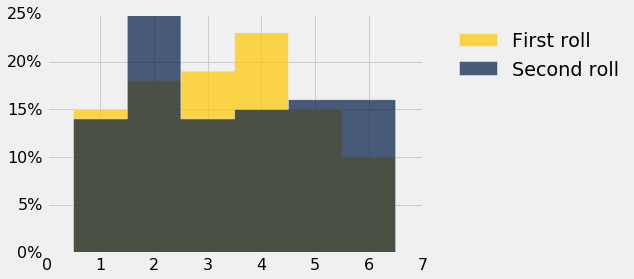

In [67]:
rolls = Table(['First roll', 'Second roll'])
for i in np.arange(100):
    row = [roll_once(6), roll_once(6)]
    rolls.append(row)
rolls.hist(bins=dice_bins)

## Randomized response

In [68]:
def respond(true_answer):
    if roll_once(6) >= 5:
        return not true_answer
    else:
        return true_answer

In [69]:
respond(False)

False

In [70]:
responses = Table(['Truth', 'Response'])
for i in np.arange(1000):
    responses.append([False, respond(False)])

responses

Truth,Response
False,True
False,True
False,False
False,True
False,False
False,False
False,True
False,False
False,False
False,True


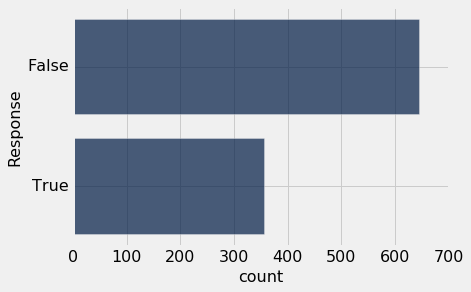

In [71]:
responses.group('Response').barh('Response')